In [15]:
import random
import csv
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection

In [49]:
class LogisticRegression:
    
    def __init__(self,alpha,featureNames,classLabel,iteration):
        self.iteration=iteration #iteration 
        self.classLabel = classLabel #class label 
        self.featureNames=featureNames #feature names 
        self.alpha=alpha #learning rate 
        self.featureVectorWeight=[] #theta values 
        for i in range(0,len(featureNames)+1): #random values 
            self.featureVectorWeight.append(random.randint(0,0)) 
        self.featureVectorWeight=np.array(self.featureVectorWeight) #numpy conversion
        
    def initiateProcess(self, trainFileName):
        xl = pd.ExcelFile(trainFileName)
        Sheet1 = xl.sheet_names
        #debug: print Sheet1[0]
        self.trainDataframe=xl.parse(Sheet1[0])
        #making feature vector,label vector 
        self.X=[]
        self.Y=[]
        #debug: print self.trainDataframe
        #iterating to access the dataframe to find out the features and classes 
        for index,row in self.trainDataframe.iterrows():
            #feature extraction and saving into list 
            _list=[]
            _list.append(1) #biasing feature 
            for i in self.featureNames:
                _list.append(row[i])
            array = np.array(_list)
            self.X.append(array)
            #class label extraction 
            self.Y.append(row[self.classLabel])
        
    def train(self):
        iteration=0
        x_values=[]
        y_values=[]
        while True:
            iteration=iteration+1
            if(iteration==self.iteration):
                break 
            cf=self.cost_function()
            x_values.append(iteration)
            y_values.append(cf)
            #print "cost function = ",cf
            self.theta_calculation()
        self.drawCostGraph(x_values,y_values)
        
    def drawCostGraph(self,x_values,y_values):
        plt.plot(x_values,y_values,linestyle='-', marker='o')
        plt.show()
        return

    def cost_function(self):
        _cost=0.0
        for i in range(0,len(self.X)):
            res=self.htheta_function(self.X[i])
            value=self.Y[i]*1.0 * math.log10(res*1.0)+(1-self.Y[i]*1.0) * math.log10(1-res*1.0)
            _cost=_cost+value 
        _cost=_cost*-1.0 
        return _cost 
    
    def theta_calculation(self):
        updated_theta_values=[]
        for i in range(0,len(self.featureVectorWeight)):
            _sum=0.0
            for j in range(0,len(self.X)):
                value=(self.htheta_function(self.X[j])-self.Y[j])*1.0
                _sum = _sum + value 
            _sum = _sum * self.alpha 
            updated_theta_values.append(self.featureVectorWeight[i]-_sum)
        self.featureVectorWeight=np.array(updated_theta_values)
        return 
                
    def sigmoid(self,z):
        denominator=1+math.exp(-1.0*z)
        nominator=1.0
        return (nominator*1.0/denominator)
    
    def htheta_function(self,feature_i):
        z=np.dot(self.featureVectorWeight,feature_i) 
        return self.sigmoid(z)
        

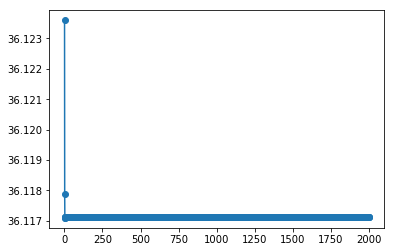

In [50]:
featureNames=["Temperature","Nausea","Lumbar pain","Urine pushing","Micturition pains","Burning of urethra","Nephritis of renal"]
classLabel="urinary bladder"
iteration=2000
lr=LogisticRegression(0.001,featureNames,classLabel,iteration)
lr.initiateProcess('/home/rizvee/Books/5-1/Text Mining/Codes/Logistric Regression/Data/Acute Inflammations.xlsx')
lr.train()